In [4]:
import pandas as pd

In [25]:
veri = pd.read_csv('smartphones.csv')
print(veri.head())

  brand_name                    model   price  avg_rating  5G_or_not  \
0      apple          Apple iPhone 11   38999         7.3          0   
1      apple  Apple iPhone 11 (128GB)   46999         7.5          0   
2      apple  Apple iPhone 11 Pro Max  109900         7.7          0   
3      apple          Apple iPhone 12   51999         7.4          1   
4      apple  Apple iPhone 12 (128GB)   55999         7.5          1   

  processor_brand  num_cores  processor_speed  battery_capacity  \
0          bionic        6.0             2.65            3110.0   
1          bionic        6.0             2.65            3110.0   
2          bionic        6.0             2.65            3500.0   
3          bionic        6.0             3.10               NaN   
4          bionic        6.0             3.10               NaN   

   fast_charging_available  ...  internal_memory  screen_size  refresh_rate  \
0                        0  ...               64          6.1            60   
1     

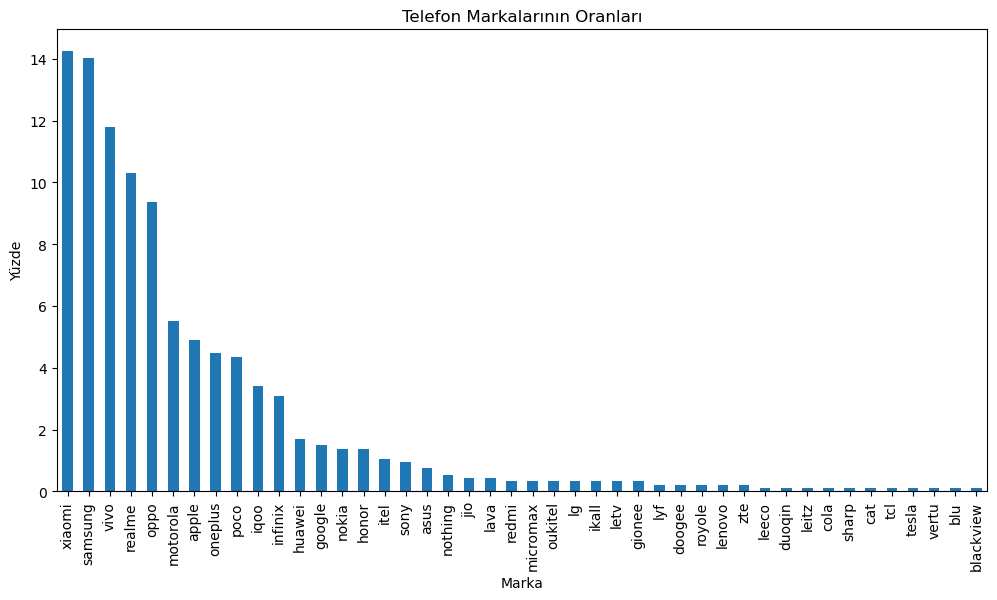

In [35]:
import matplotlib.pyplot as plt

telefon_sayilari = veri['brand_name'].value_counts()

toplam_telefon_sayisi = len(veri)

oranlar = (telefon_sayilari / toplam_telefon_sayisi) * 100

plt.figure(figsize=(12, 6))
oranlar.plot(kind='bar')
plt.title('Telefon Markalarının Oranları')
plt.xlabel('Marka')
plt.ylabel('Yüzde')
plt.show()


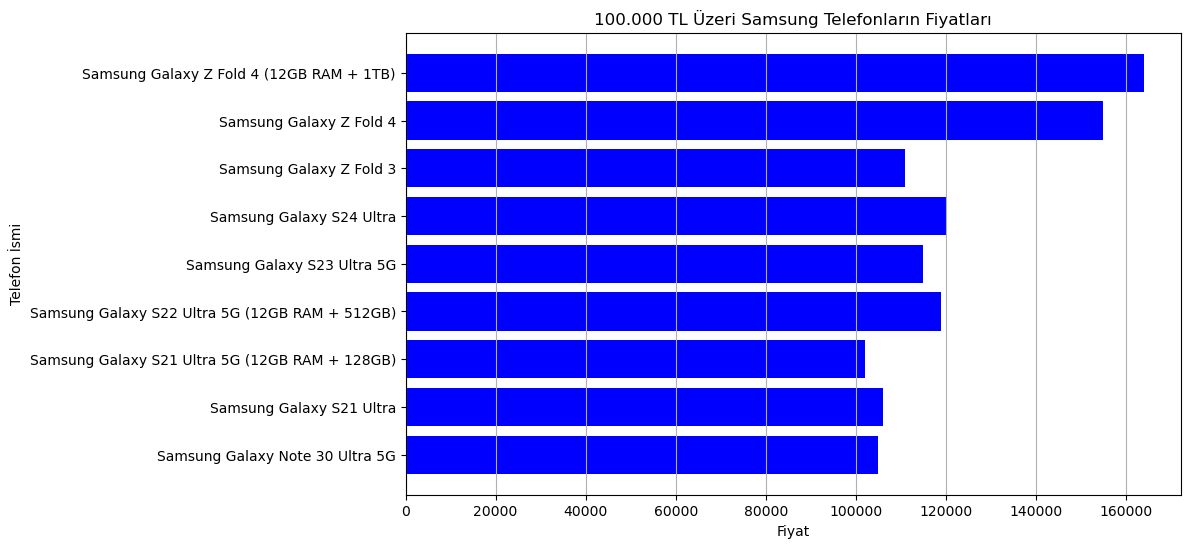

In [63]:

samsung_veri = veri[(veri['brand_name'] == 'samsung') & (veri['price'] > 100000)]

telefon_isimleri = samsung_veri['model']
fiyatlar = samsung_veri['price']

plt.figure(figsize=(10, 6))
plt.barh(telefon_isimleri, fiyatlar, color='blue')
plt.xlabel('Fiyat')
plt.ylabel('Telefon İsmi')
plt.title('100.000 TL Üzeri Samsung Telefonların Fiyatları')
plt.grid(axis='x')

plt.show()

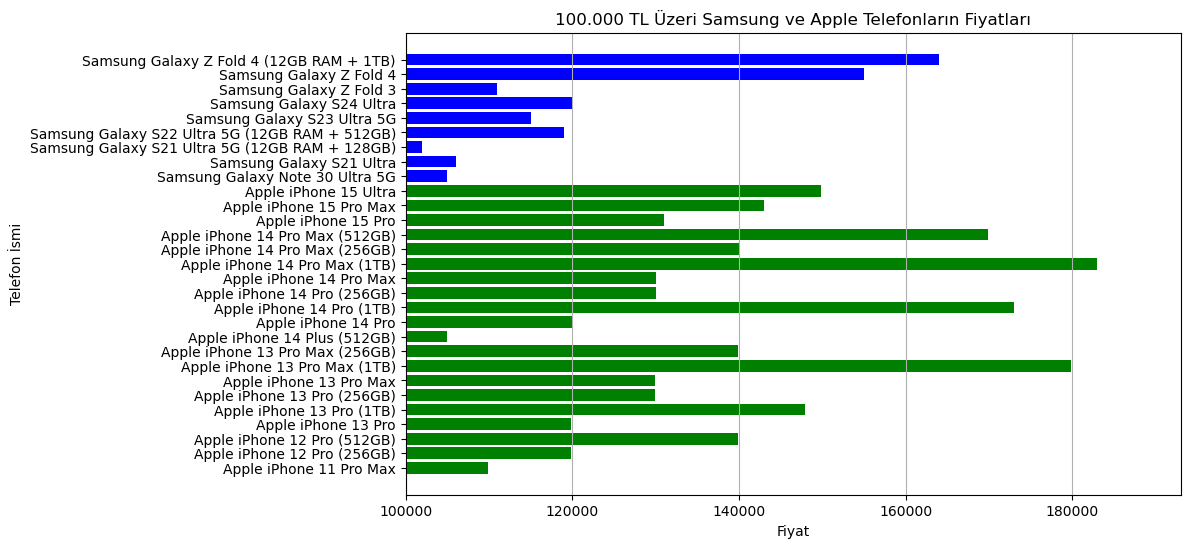

In [69]:
filtre = (veri['brand_name'].isin(['samsung', 'apple'])) & (veri['price'] > 100000)
filtrelenmis_veri = veri[filtre]

telefon_isimleri = filtrelenmis_veri['model']
fiyatlar = filtrelenmis_veri['price']
markalar = filtrelenmis_veri['brand_name']

plt.figure(figsize=(10, 6))
plt.barh(telefon_isimleri, fiyatlar, color=markalar.map({'samsung': 'blue', 'apple': 'green'}))
plt.xlabel('Fiyat')
plt.ylabel('Telefon İsmi')
plt.title('100.000 TL Üzeri Samsung ve Apple Telefonların Fiyatları')
plt.grid(axis='x')

plt.xlim(100000, fiyatlar.max() + 10000)

plt.show()

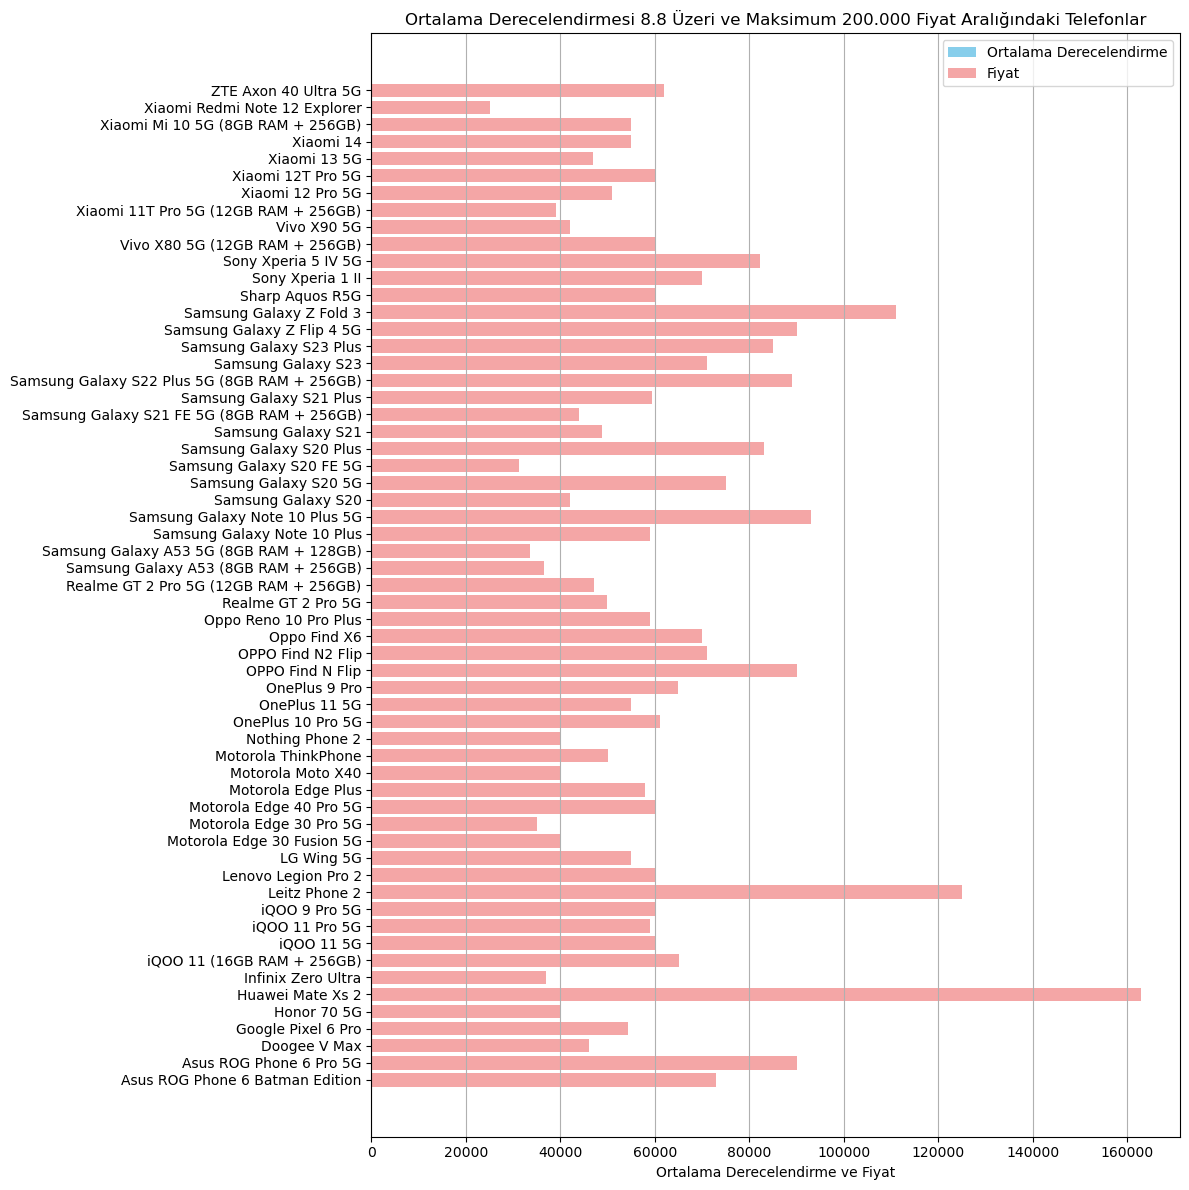

In [88]:
filtre_fiyat = (veri['price'] <= 200000)
veri_fiyat_filtrelenmis = veri[filtre_fiyat]

filtre_derece = (veri_fiyat_filtrelenmis['avg_rating'] >= 8.8)
veri_filtrelenmis = veri_fiyat_filtrelenmis[filtre_derece]

telefon_isimleri = veri_filtrelenmis['model']
ortalama_derecelendirme = veri_filtrelenmis['avg_rating']
fiyatlar = veri_filtrelenmis['price']

plt.figure(figsize=(12, 12))
plt.barh(telefon_isimleri, ortalama_derecelendirme, color='skyblue', label='Ortalama Derecelendirme')
plt.barh(telefon_isimleri, fiyatlar, color='lightcoral', label='Fiyat', alpha=0.7)
plt.xlabel('Ortalama Derecelendirme ve Fiyat')
plt.title('Ortalama Derecelendirmesi 8.8 Üzeri ve Maksimum 200.000 Fiyat Aralığındaki Telefonlar')
plt.legend(loc='upper right')
plt.grid(axis='x')

# Grafiği göster
plt.tight_layout()
plt.show()